# Proyek Analisis Data: PRSA_Data_Nongzhanguan_20130301-20170228.csv
- **Nama:** Joshua Kresna Kusmono
- **Email:** kusmonoj@gmail.com
- **ID Dicoding:** jshkrsna

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren kualitas udara di sekitar stasiun Nongzhanguan berdasarkan bulan? Dan di bulan berapa polusi udara terjadi kenaikan dan penurunan secara signifikan?
2. Bagaimana kecepatan angin mempengaruhi tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Data Wrangling

### Gathering Data

In [30]:
air_quality_nongzhanguan_df = pd.read_csv('./data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')

**Insight:**
- Mengambil dataset dari Github tentang kualitas udara dari statiun Nongzhanguan, China.

### Assessing Data

In [31]:
# mencari value data yang hilang
print(f"Value data yang hilang:\n", air_quality_nongzhanguan_df.isna().sum())

Value data yang hilang:
 No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [32]:
# mencari data yang terduplikat
print("Jumlah data yang terduplikat:", air_quality_nongzhanguan_df.duplicated().sum(), "data")

Jumlah data yang terduplikat: 0 data


In [33]:
# mencari ketidakakuratan value
print(air_quality_nongzhanguan_df.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
std       86.225344     95.341177     24.280665    

In [34]:
# mendeteksi value yang tidak valid
print(air_quality_nongzhanguan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


**Insight:**
- Di bagian value yang hilang, tercatat:
  - PM2.5 ada 628 data hilang
  - PM10 ada 440 data hilang
  - SO2 ada 446 data hilang
  - NO2 ada 692 data hilang
  - CO ada 1206 data hilang
  - O3 ada 506 data hilang
  - TEMP ada 20 data hilang
  - PRES ada 20 data hilang
  - DEWP ada 20 data hilang
  - RAIN ada 20 data hilang
  - WD ada 78 data hilang
  - WSPM ada 14 data hilang
- Di bagian data yang terduplikat, tercatat bahwa tidak ada data yang terduplikasi.
- Di bagian ketidakakuratan value, tercatat:
  - PM2.5 memiliki nilai max yang tidak wajar yaitu sebesar 844, yang mana jauh dari 75% yaitu sebesar 116.
  - PM10 memiliki nilai max yang tidak wajar yaitu sebesar 995, yang mana jauh dari 75% yaitu sebesar 149.
  - SO2 memiliki nilai max yang tidak wajar yaitu sebesar 257, yang mana jauh dari 75% yaitu sebesar 273.
  - CO memiliki nilai max yang tidak wajar yaitu sebesar 10000, yang mana jauh dari 75% yaitu sebesar 1600.
  - O3 memiliki nilai max yang tidak wajar yaitu sebesar 390, yang mana jauh dari 75% yaitu sebesar 84.
  - RAIN memiliki nilai max yang tidak wajar yaitu sebesar 46.4, yang mana jauh dari 75% yaitu 0.
  - WSPM (wind speed) memiliki nilai yang max yang tidak wajar sebesar 10.5, yang mana jauh dari 75% yaitu sebesar 2.4.
- Di bagian value yang tidak valid, semua tipe data valid.

### Cleaning Data

In [35]:
# interpolasi kolom numerik yang tercatat ada data yang hilang
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for column in numeric_columns:
  air_quality_nongzhanguan_df[column].interpolate(
      method='linear', # metode linear
      limit_direction='forward', # mengisi nilai ke depan
      inplace=True
  )

# interpolasi kolom non numerik yang tercatat ada data yang hilang
air_quality_nongzhanguan_df['wd'].interpolate(
    method='ffill', # mengisi dengan metode nilai ke depan
    inplace=True
)

/tmp/ipykernel_12746/4014344022.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_nongzhanguan_df[column].interpolate(
/tmp/ipykernel_12746/4014344022.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [36]:
# jumlah value data yang hilang setelah dilakukan interpolasi
print(f"Value data yang hilang:\n", air_quality_nongzhanguan_df.isna().sum())

Value data yang hilang:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [37]:
# jumlah data setelah dilakukan interpolasi
print(air_quality_nongzhanguan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [38]:
print(numeric_columns)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [39]:
# membuat batas bawah/Q1 dan batas atas/Q3 untuk mencapai hasil kuartil dengan pengurangan dari batas atas dan batas bawah
Q1 = (air_quality_nongzhanguan_df[numeric_columns]).quantile(0.25)
Q3 = (air_quality_nongzhanguan_df[numeric_columns]).quantile(0.75)
IQR = Q3 - Q1

# karena yang dicari nilai outlier, maka yang digunakan hanya maximum
nilai_maximum = Q3 + (1.5*IQR)

# membuat logika perbandingan semua data yang ada di kolom numerik dengan nilai batas atas
kondisi_jika_lebih_dari_batas_atas = air_quality_nongzhanguan_df[numeric_columns] > nilai_maximum

# membuat teknik imputation
air_quality_nongzhanguan_df.mask(kondisi_jika_lebih_dari_batas_atas, nilai_maximum, axis=1, inplace=True)


In [40]:
# max data setelah menggunakan teknik Imputation, nilai menjadi wajar
air_quality_nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.0,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.540755,105.506557,16.373258,57.781783,1212.157526,56.780354,13.668250,1012.551871,2.445126,0.0,1.808128
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.964422,82.915347,16.798299,35.348078,885.140261,53.444520,11.459735,10.266471,13.811939,0.0,1.118847
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.0,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.0,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.0,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,24.000000,80.000000,1600.000000,83.000000,23.500000,1020.900000,15.000000,0.0,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,257.000000,315.500000,55.500000,156.500000,3250.000000,192.500000,41.100000,1042.000000,28.800000,0.0,4.500000


In [47]:
# saving data after cleaning 
air_quality_nongzhanguan_df.to_csv('./dashboard/main_data.csv')

**Insight:**
- Permasalahan dari data yang hilang. Saya menggunakan teknik interpolasi, alasannya adalah karena data yang hilang cukup banyak. Jika dihapus maka akan kehilangan banyak informasi. Terlihat setelah data cleaning menggunakan teknik interpolasi. Selain data yang hilang sudah tidak ada, teknik ini tetap menjaga keutuhan data asli.
- Permasalahan dari ketidakakuratan value. Saya menggunakan teknik Imputation, alasannya adalah saya ingin tetap menjaga informasi tetap ada dengan mengganti outlier menjadi nilai yang wajar dengan batas atas. Terlihat kolom yang memiliki data outlier. Setelah di data cleaning menggunakan teknik Imputation, max dari data menjadi nilai yang wajar tanpa kehilangan keutuhan data asli.

## Exploratory Data Analysis (EDA)

### Explore ...

In [41]:
# membuat rata-rata per 1 bulan
tren_air_quality = air_quality_nongzhanguan_df.groupby(by=['year', 'month']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean'
}).apply(lambda c: c.astype(int)) # menerapkan agar hasil yang aslinya float diubah menjadi int. hal ini agar mudah dalam membaca

In [42]:
print(tren_air_quality)

            PM2.5  PM10  SO2  NO2    CO   O3  TEMP  PRES  DEWP  RAIN  WSPM
year month                                                                
2013 3        101   121   33   74  1419   58     6  1014    -7     0     1
     4         57    96   21   54   931   62    12  1009    -3     0     2
     5         76   128   25   58  1127   81    21  1004     7     0     1
     6        104   106   17   52  1502   74    23  1001    17     0     1
     7         75    70    8   40  1142   80    27   997    20     0     1
     8         68    74    6   49  1026   74    27  1000    20     0     1
     9         81    99   13   69  1280   46    20  1010    14     0     1
     10        94   110   18   65  1257   25    13  1017     4     0     1
     11        80   104   21   60  1286   22     6  1018    -8     0     1
     12        80   109   34   65  1422   21     0  1021   -14     0     1
2014 1         98   127   41   67  1722   20     0  1021   -13     0     1
     2        131   148  

In [43]:
# membuat dataframe lalu dengan data frame tersebut langsung dikorelasikan
air_quality_df = pd.DataFrame(air_quality_nongzhanguan_df[numeric_columns])
wspm_correlation_pollutants_columns = air_quality_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']].corr()

print(wspm_correlation_pollutants_columns)

          PM2.5      PM10       SO2       NO2        CO        O3      WSPM
PM2.5  1.000000  0.904530  0.573501  0.688713  0.823729 -0.203425 -0.336734
PM10   0.904530  1.000000  0.562279  0.693355  0.752145 -0.178201 -0.254711
SO2    0.573501  0.562279  1.000000  0.531651  0.635049 -0.212172 -0.168171
NO2    0.688713  0.693355  0.531651  1.000000  0.733618 -0.554127 -0.495509
CO     0.823729  0.752145  0.635049  0.733618  1.000000 -0.368195 -0.413818
O3    -0.203425 -0.178201 -0.212172 -0.554127 -0.368195  1.000000  0.359145
WSPM  -0.336734 -0.254711 -0.168171 -0.495509 -0.413818  0.359145  1.000000


**Insight:**
- Mencari tren menggunakan groupby dan pivot. Lalu setelah itu membuat argumen ke semua kolom numerik untuk mencari rata - rata polutan per 1 bulan. Dengan hasil yang dikonversikan dari float ke int menggunakan lambda, agar lebih mudah dipahami dan dibaca.  
- Mencari korelasi antara WSPD dengan polutan utama seperti PM2.5, PM10, SO2, CO, dan O3.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

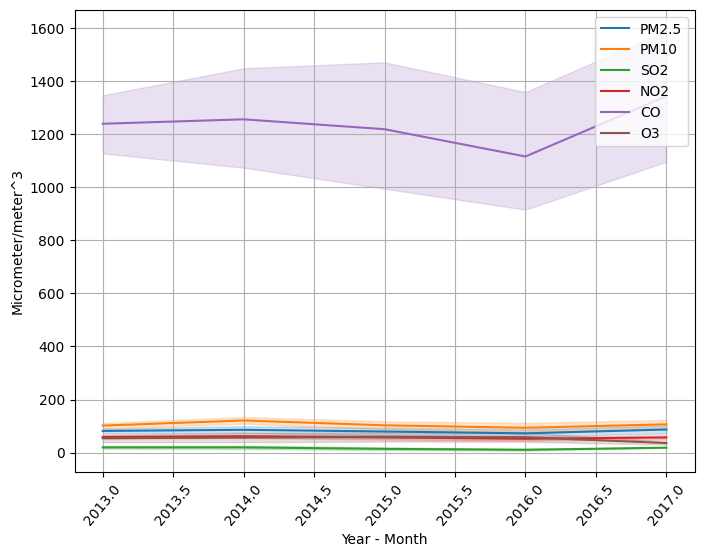

In [44]:
# membuat klasidikasi yang termasuk dengan polutan utama
main_pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(8, 6))
for pollutant in main_pollutants:
    sb.lineplot(tren_air_quality, x='year', y=pollutant, label=pollutant)
plt.xticks(rotation=50)
plt.legend(loc='upper right')
plt.xlabel('Year - Month')
plt.ylabel('Micrometer/meter^3')
plt.grid(True)
plt.show()

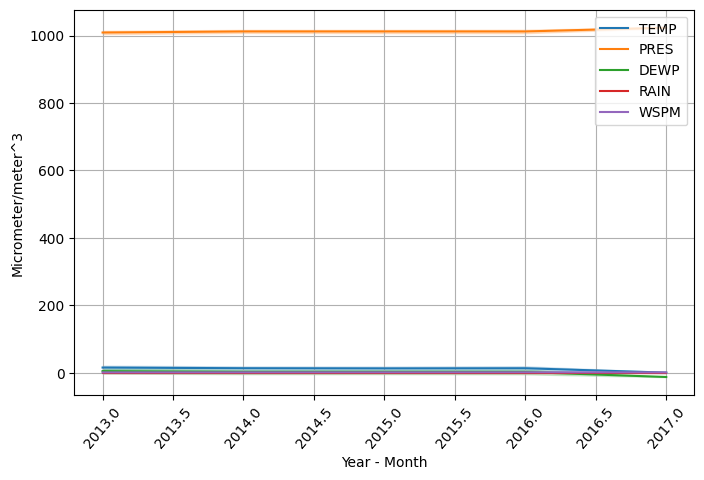

In [45]:
# membuat klasifikasi yang tidak termasuk polutan utama
other_pollutants = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

plt.figure(figsize=(8, 5))
for pollutant in other_pollutants:
    sb.lineplot(tren_air_quality, x='year', y=pollutant, label=pollutant)
plt.xticks(rotation=50)
plt.legend(loc='upper right')
plt.xlabel('Year - Month')
plt.ylabel('Micrometer/meter^3')
plt.grid(True)
plt.show()

**Insight:**
- Plot garis yang pertama yaitu polutan utama, dengan ditampilkan label x yaitu tahun dan per setengah tahun (6 bulan) dan ditampilkan label y yaitu parameter mikrometer/meter^3. Dari isi plot garis, terlihat bahwa CO memiliki ukuran yang besar dikarenakan parameter dari CO sendiri adalah hasil pengkonversian miligram/m^3, sehingga jika dikonversi ke mikrometer/m^3 menjadi dikali 1000. Selain itu juga jika dilihat secara garis besar, tidak ada peningkatan secara signifikan dari tahun 2013 sampai tahun 2017.
- Plot garis kedua yaitu polutan lainnya, dengan tampilannya yang sama dengan plot garis kesatu. Yang membedakan adalah isi plot garisnya, PRES memiliki ukuran yang besar namun itu masih dalam batas normal. Sama seperti lainnya, tidak ada perbedaan signifikan dari perubahan polusi udara.

### Pertanyaan 2:

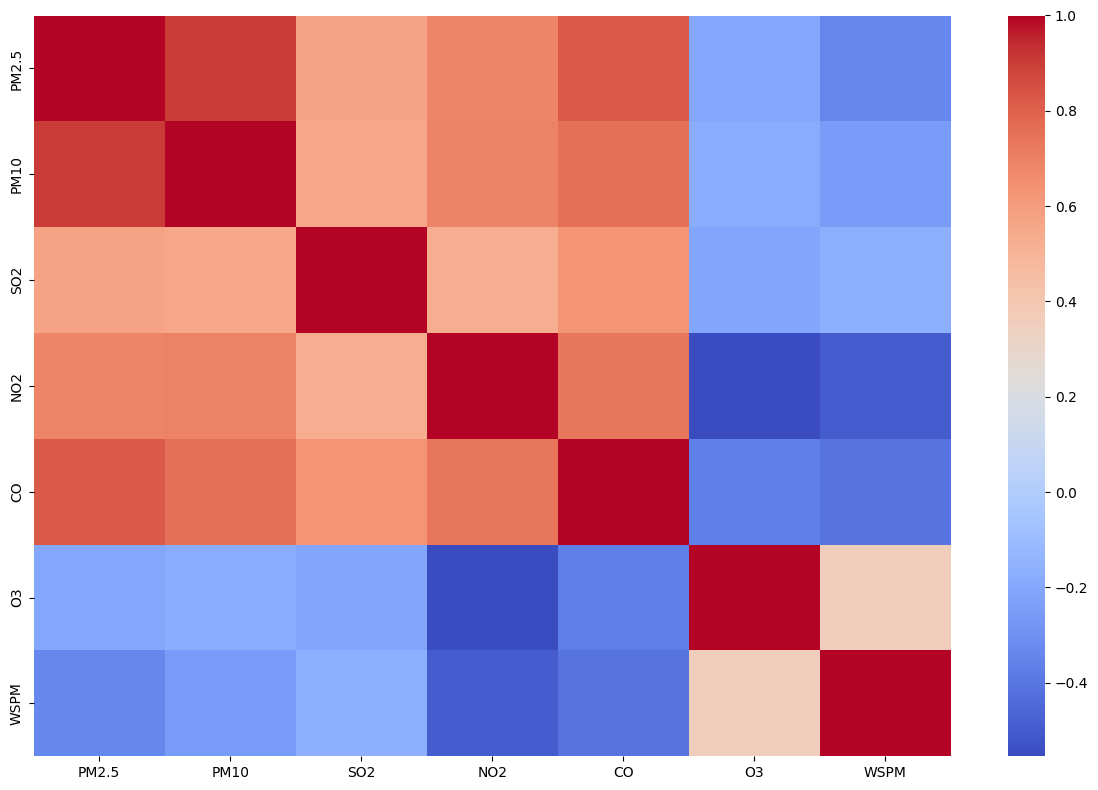

In [46]:
# mengubah nama dari correlation wspm
correlations = wspm_correlation_pollutants_columns

plt.figure(figsize=(12, 8))
sb.heatmap(correlations, cmap='coolwarm')
plt.tight_layout()
plt.show()

**Insight:**
- Dapat mengetahui dengan warna semakin merah, maka menunjukkan positif yang berarti sama atau berhubungan. Terlihat seperti di plot heatmap, PM2.5 dan PM10 memiliki warna yang hampir sama. Ini disebabkan karena 2 unsur ini mempunyai kemiripan yang membedakan hanyalah ukuran.
- Dapat mengetahui dengan warna semakin biru, maka menunjukkan negatif yang berarti tidak sama atau tidak ada hubungannya. Terlihat seperti O3 karena 03 hanya mengandung fotokimia, sedangkan WSPM dapat mengurangi intensitas PM2.5 dan PM10.

## Analisis Lanjutan (Opsional)

## Conclusion

- Dari penilitian ini, bisa disimpulkan bahwa pertanyaan kesatu jawabannya adalah tidak ada perbedaan signifikan secara garis besar. Dan rata-rata masih dalam batas normal.
- Untuk pertanyaan kedua yaitu korelasi kecepatan angin dengan polutan utama seperti PM2.5, PM10, SO2, CO, menunjukkan positif atau berhubungan. Hal ini berarti bahwa kecepatan angin mempengaruhi polutan udara, semakin kencang anginnya makan semakin rendah pula polutannya. Sebaliknya jika dikorelasikan dengan O3, menunjukkan bahwa sama-sama negatif dengan WSPM menandakan bahwa kecepatan angin tidak terpengaruh dengan O3.